### debitcard_1

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [53]:
base = pd.read_csv("../Datas/csv_files/train/train_base.csv")
data = pd.read_csv("../Datas/csv_files/train/depth 1/train_debitcard_1.csv")

In [55]:
base

,case_id,date_decision,MONTH,WEEK_NUM,target
0,0,2019-01-03,201901,0,0
1,1,2019-01-03,201901,0,0
2,2,2019-01-04,201901,0,0
3,3,2019-01-03,201901,0,0
4,4,2019-01-04,201901,0,1
...,...,...,...,...,...
1526654,2703450,2020-10-05,202010,91,0
1526655,2703451,2020-10-05,202010,91,0
1526656,2703452,2020-10-05,202010,91,0
1526657,2703453,2020-10-05,202010,91,0


In [56]:
data

,case_id,last180dayaveragebalance_704A,last180dayturnover_1134A,last30dayturnover_651A,num_group1,openingdate_857D
0,225,NaN,NaN,NaN,0,2016-08-16
1,331,NaN,NaN,NaN,0,2015-03-19
2,358,NaN,NaN,NaN,0,2014-09-02
3,390,NaN,NaN,NaN,0,2014-07-23
4,390,NaN,NaN,NaN,2,2016-06-08
...,...,...,...,...,...,...
157297,2703430,NaN,NaN,NaN,8,2016-11-26
157298,2703430,NaN,NaN,NaN,2,2014-02-14
157299,2703439,NaN,NaN,NaN,0,2016-11-25
157300,2703453,NaN,NaN,NaN,1,2015-05-29


In [57]:
# object → datetime64
data["openingdate_857D"] = pd.to_datetime(data["openingdate_857D"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157302 entries, 0 to 157301
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   case_id                        157302 non-null  int64         
 1   last180dayaveragebalance_704A  12216 non-null   float64       
 2   last180dayturnover_1134A       11081 non-null   float64       
 3   last30dayturnover_651A         11081 non-null   float64       
 4   num_group1                     157302 non-null  int64         
 5   openingdate_857D               144591 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 7.2 MB


#### 01\. Exploratory Data Analysis<br>

##### &nbsp;&nbsp;1\) Column별 내용<span style="font-size:16px;">(추정)</span><br>
&nbsp;(1) <b>last180dayaveragebalance_704A</b>: 최근 180일 동안 직불카드의 평균 잔액<span style="font-size:16px">(Average balance on debit card in the last 180 days)</span><br>
&nbsp;(2) <b>last180dayturnover_1134A</b>: 최근 180일 동안 직불카드의 평균 출금액<span style="font-size:16px">(Debit card's turnover within the last 180 days)</span><br>
&nbsp;(3) <b>last30dayturnover_651A</b>: 최근 30일 동안 직불카드의 평균 출금액<span style="font-size:16px">(Debit card turnover for the last 30 days)</span><br>
&nbsp;(4) <b>openingdate_857D</b>: 직불 카드 최초 발급일<span style="font-size:16px">(Debit card opening date)</span>

##### &nbsp;&nbsp;2\) `num_group1`의 의미 <span style="font-size:18px;">(※ 추측=<span style="color:orange;">주황</span>, 유력 가설=<b><span style="color:orange;">볼드</span></b>, 팩트=<span style="color:limegreen;">초록</span>)</span><br>
- <span style="color:limegreen;">`num_group1`이 0인 사람은 대출 신청자임</span><br>
- <span style="color:orange;">주황</span><br>
- 

&nbsp;(1) `num_group1`의 범위

In [58]:
data["num_group1"].value_counts(normalize=True)

0     0.710557
1     0.186323
2     0.058308
3     0.020540
4     0.008976
        ...   
38    0.000006
55    0.000006
43    0.000006
57    0.000006
50    0.000006
Name: num_group1, Length: 66, dtype: float64

In [59]:
num_group1_list = list(set(data["num_group1"].values))
len(num_group1_list)  # 0~65

66

&nbsp;(2) `num_group1`이 0인 값과 0이 아닌 값 비교

In [60]:
from sklearn.utils import resample
from scipy.stats import ks_2samp

ng_0 = data[data["num_group1"] == 0]
ng_non0 = data[data["num_group1"] != 0]

upsampled_ng_non0 = pd.DataFrame(resample(ng_non0, replace=True, n_samples=len(ng_0), random_state=0xC0FFEE))  # 분포 비교를 위해 업샘플링

# 두 데이터셋의 분포 비교
ks_stat, p_val = ks_2samp(ng_non0["last180dayaveragebalance_704A"], upsampled_ng_non0["last180dayaveragebalance_704A"])

print("KS statistic:", ks_stat)
print("P-value:", p_val)  # p-value가 0.05 이상이므로 H0 기각 실패 → 두 데이터의 분포는 동일하다

KS statistic: 0.00014019589736343104
P-value: 1.0


In [61]:
ng_0

,case_id,last180dayaveragebalance_704A,last180dayturnover_1134A,last30dayturnover_651A,num_group1,openingdate_857D
0,225,NaN,NaN,NaN,0,2016-08-16
1,331,NaN,NaN,NaN,0,2015-03-19
2,358,NaN,NaN,NaN,0,2014-09-02
3,390,NaN,NaN,NaN,0,2014-07-23
9,445,NaN,NaN,NaN,0,2015-04-27
...,...,...,...,...,...,...
157288,2703426,NaN,NaN,NaN,0,2015-11-26
157289,2703427,NaN,NaN,NaN,0,2015-06-26
157295,2703430,NaN,NaN,NaN,0,2015-02-13
157299,2703439,NaN,NaN,NaN,0,2016-11-25


In [62]:
ng_non0

,case_id,last180dayaveragebalance_704A,last180dayturnover_1134A,last30dayturnover_651A,num_group1,openingdate_857D
4,390,NaN,NaN,NaN,2,2016-06-08
5,390,NaN,NaN,NaN,1,2015-10-01
6,445,NaN,NaN,NaN,4,2016-07-19
7,445,NaN,NaN,NaN,1,2015-08-01
8,445,NaN,NaN,NaN,3,2016-02-22
...,...,...,...,...,...,...
157294,2703430,NaN,NaN,NaN,3,2015-03-19
157296,2703430,NaN,NaN,NaN,5,2015-08-25
157297,2703430,NaN,NaN,NaN,8,2016-11-26
157298,2703430,NaN,NaN,NaN,2,2014-02-14


- last180dayaveragebalance_704A
    - 대출 신청자들의 직불카드 평균 잔액이 더 적음
    - num_group1에 따른 결측치 비율
        - 0일 때 약 89.92%
        - 0이 아닐 때 약 97.93%

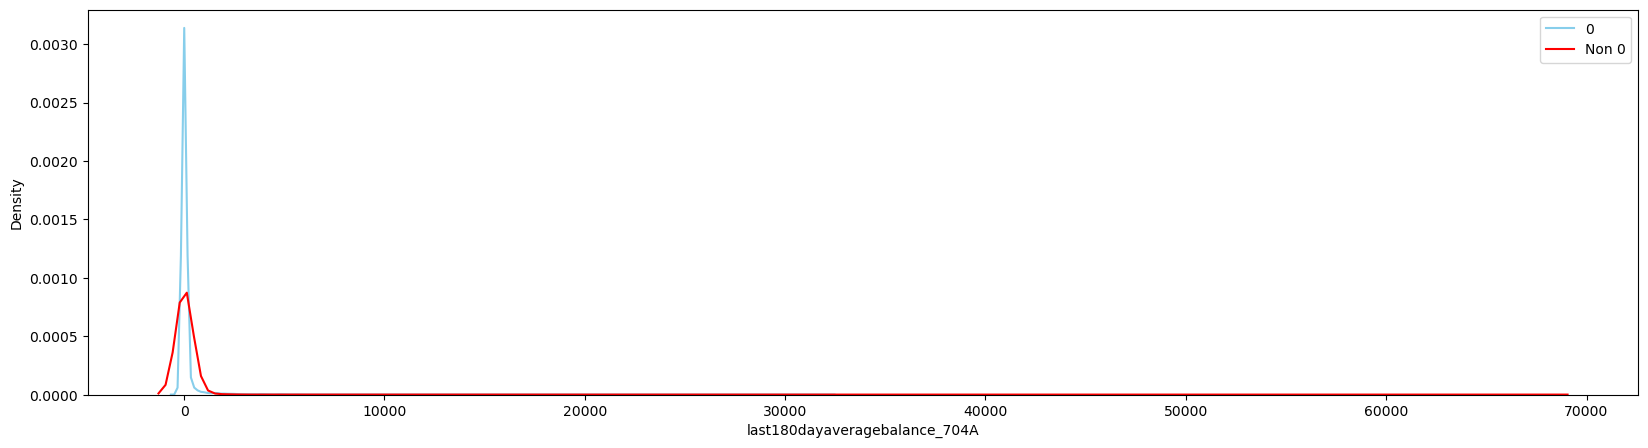

In [63]:
# 분포 비교 (+ Upsampling)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

sns.kdeplot(data=ng_0["last180dayaveragebalance_704A"], ax=ax, label="0", color='skyblue')
sns.kdeplot(data=upsampled_ng_non0["last180dayaveragebalance_704A"], ax=ax, label="Non 0", color='red')

plt.legend()
plt.show()

In [64]:
# num_group1에 따른 결측치 처리
total_count = len(ng_0)
null_count = len(ng_0[~ng_0["last180dayaveragebalance_704A"].notna()])

print("Null Ratio when num_group1 is 0: {:.2f}%".format((null_count / total_count)*100))

total_count = len(ng_non0)
null_count = len(ng_non0[~ng_non0["last180dayaveragebalance_704A"].notna()])

print("Null Ratio when num_group1 is not 0: {:.2f}%".format((null_count / total_count)*100))

Null Ratio when num_group1 is 0: 89.92%
Null Ratio when num_group1 is not 0: 97.93%


- last180dayturnover_1134A
    - 분포에서 큰 차이가 발견되지 않음
    - num_group1에 따른 결측치 비율
        - 0일 때 약 90.91%
        - 0이 아닐 때 약 97.97%

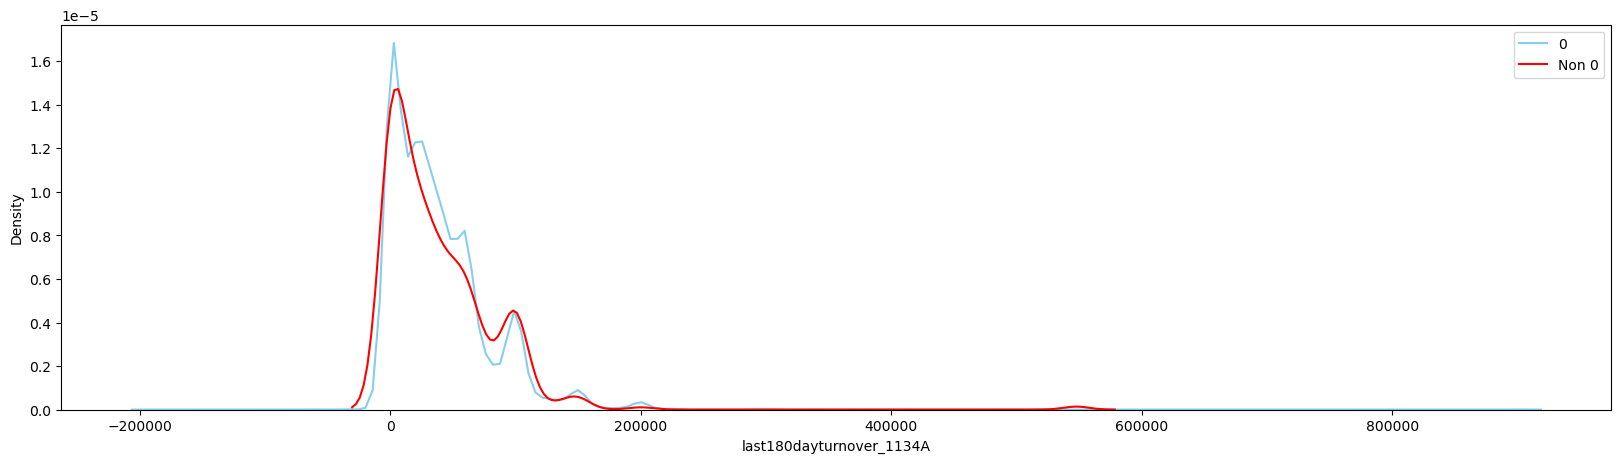

In [65]:
# 분포 비교 (+ Upsampling)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

sns.kdeplot(data=ng_0["last180dayturnover_1134A"], ax=ax, label="0", color='skyblue')
sns.kdeplot(data=upsampled_ng_non0["last180dayturnover_1134A"], ax=ax, label="Non 0", color='red')

plt.legend()
plt.show()

In [66]:
# num_group1에 따른 결측치 처리
total_count = len(ng_0)
null_count = len(ng_0[~ng_0["last180dayturnover_1134A"].notna()])

print("Null Ratio when num_group1 is 0: {:.2f}%".format((null_count / total_count)*100))

total_count = len(ng_non0)
null_count = len(ng_non0[~ng_non0["last180dayturnover_1134A"].notna()])

print("Null Ratio when num_group1 is not 0: {:.2f}%".format((null_count / total_count)*100))

Null Ratio when num_group1 is 0: 90.91%
Null Ratio when num_group1 is not 0: 97.97%


- last30dayturnover_651A
    - 대출 신청자가 출금액이 0인 사람도, 출금액이 많은 사람도 더 많음
    - num_group1에 따른 결측치 비율
        - 0일 때 약 90.91%
        - 0이 아닐 때 약 97.97%

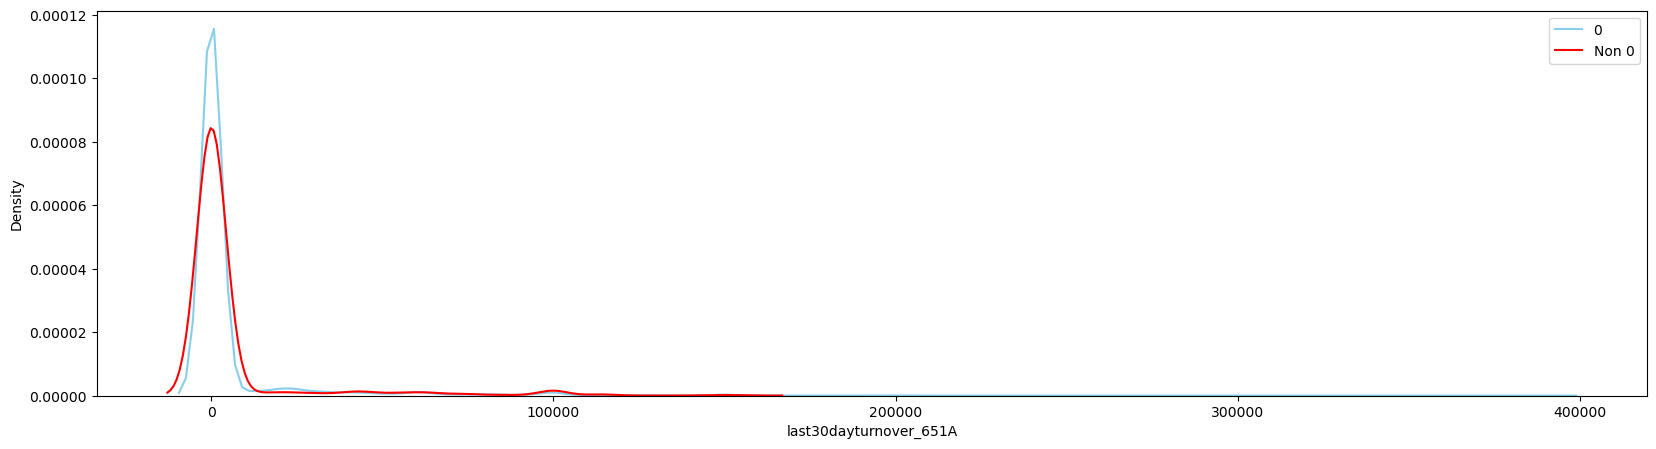

In [67]:
# 분포 비교 (+ Upsampling)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

sns.kdeplot(data=ng_0["last30dayturnover_651A"], ax=ax, label="0", color='skyblue')
sns.kdeplot(data=upsampled_ng_non0["last30dayturnover_651A"], ax=ax, label="Non 0", color='red')

plt.legend()
plt.show()

In [68]:
# num_group1에 따른 결측치 처리
total_count = len(ng_0)
null_count = len(ng_0[~ng_0["last30dayturnover_651A"].notna()])

print("Null Ratio when num_group1 is 0: {:.2f}%".format((null_count / total_count)*100))

total_count = len(ng_non0)
null_count = len(ng_non0[~ng_non0["last30dayturnover_651A"].notna()])

print("Null Ratio when num_group1 is not 0: {:.2f}%".format((null_count / total_count)*100))

Null Ratio when num_group1 is 0: 90.91%
Null Ratio when num_group1 is not 0: 97.97%


- openingdate_857D
    - 대출 신청자들이 2014년에 직불카드 신청이 많았고, 나머지는 2016년에 신청이 많았음
    - num_group1에 따른 결측치 비율
        - 0일 때 약 9.6%
        - 0이 아닐 때 약 4.36%

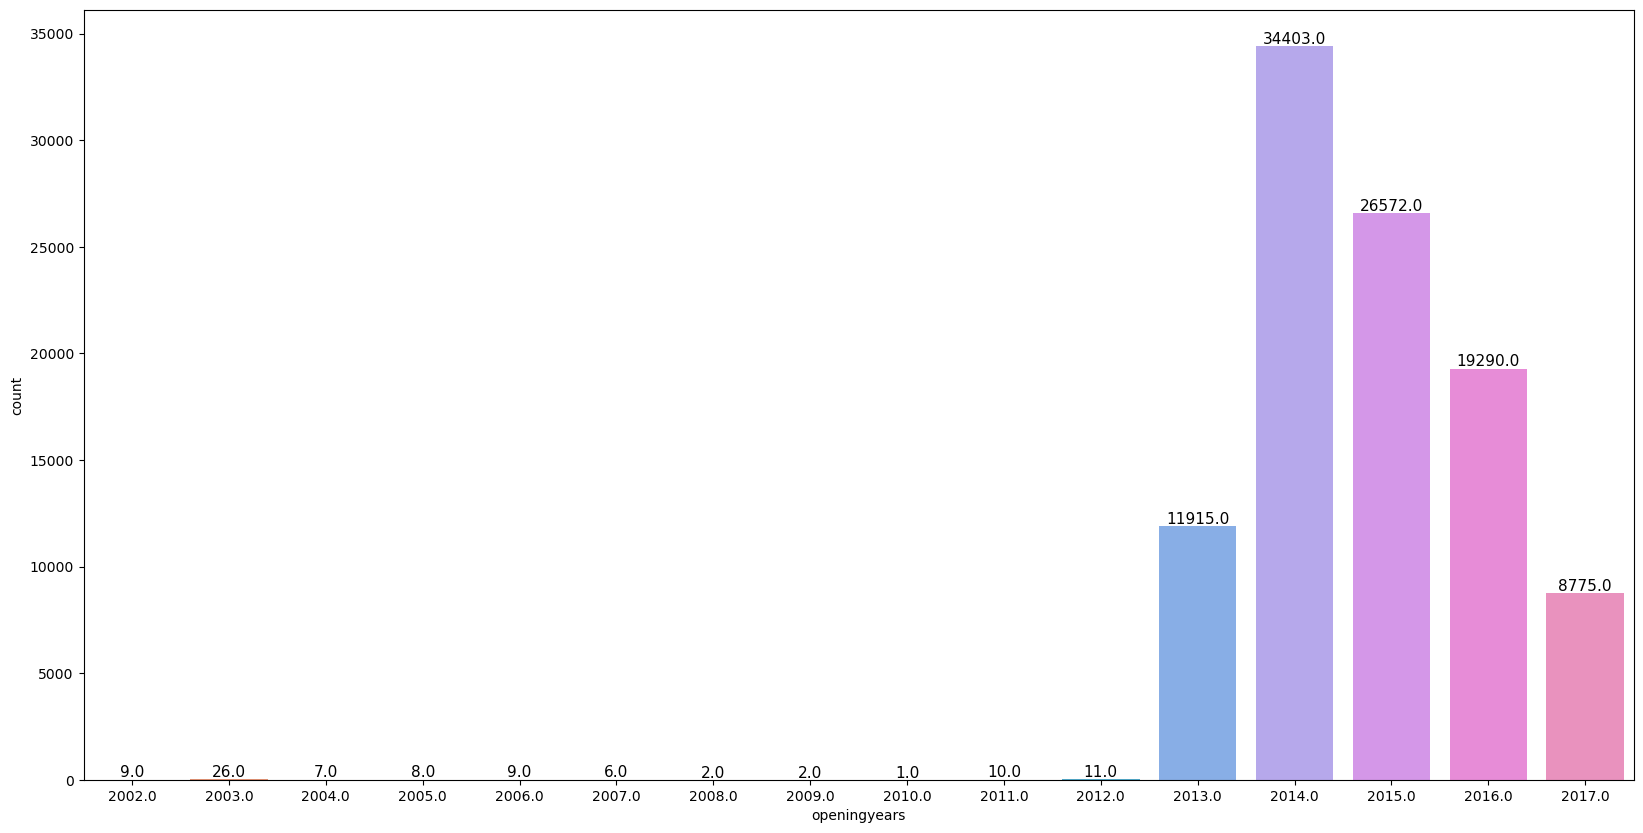

In [69]:
# num_group1 = 0
ng_0["openingyears"] = ng_0["openingdate_857D"].dt.year

plt.figure(figsize=(20, 10))
ax = sns.countplot(ng_0, x="openingyears")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.show()

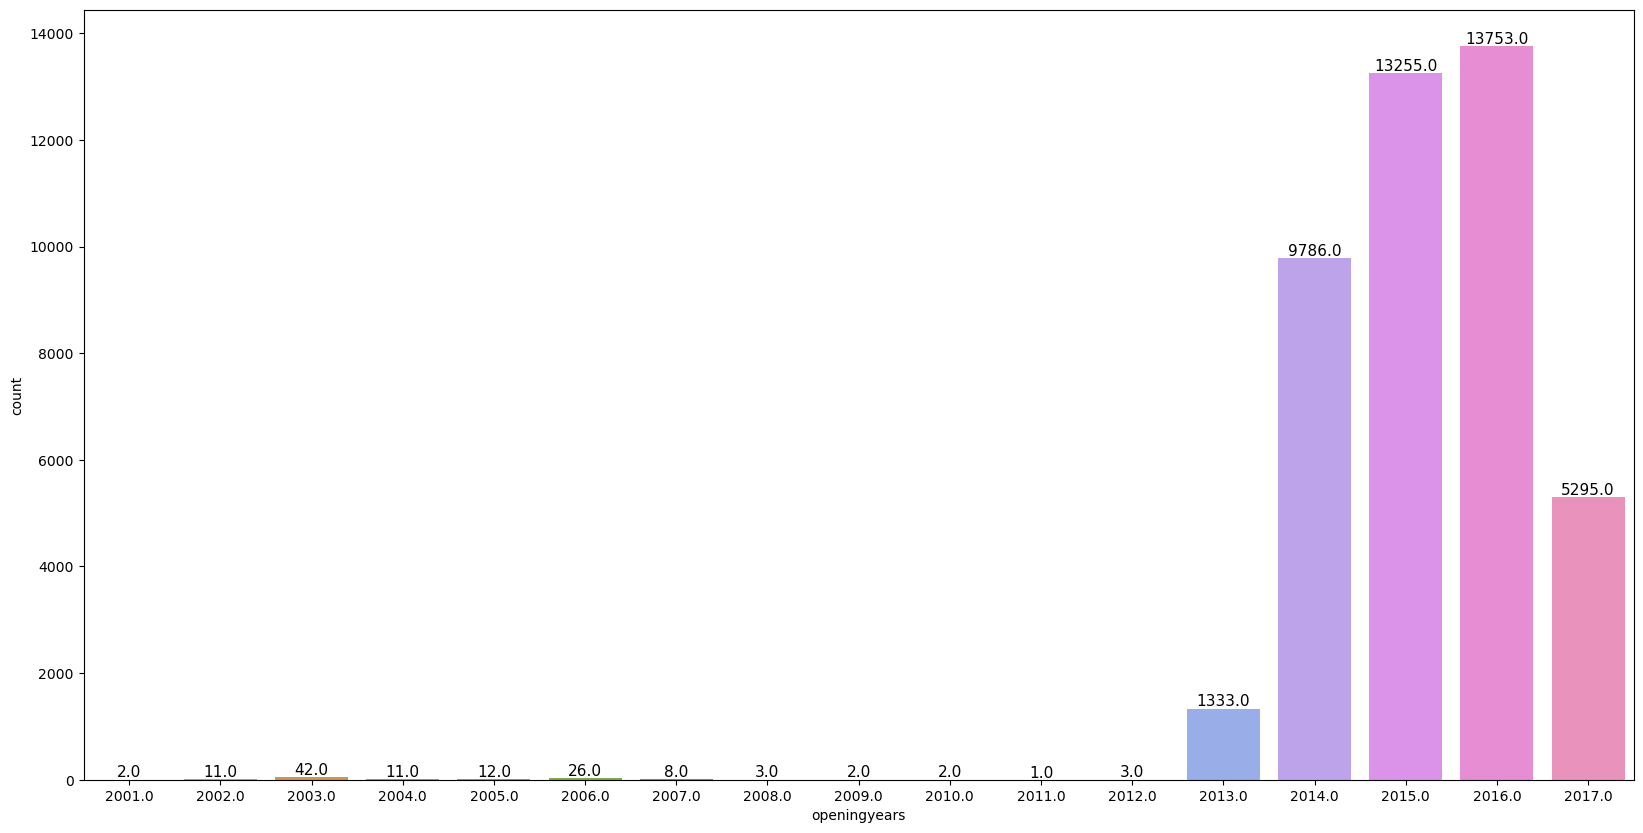

In [70]:
# num_group1 != 0
ng_non0["openingyears"] = ng_non0["openingdate_857D"].dt.year

plt.figure(figsize=(20, 10))
ax = sns.countplot(ng_non0, x="openingyears")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.show()

In [71]:
# num_group1에 따른 결측치 처리
total_count = len(ng_0)
null_count = len(ng_0[~ng_0["openingdate_857D"].notna()])

print("Null Ratio when num_group1 is 0: {:.2f}%".format((null_count / total_count)*100))

total_count = len(ng_non0)
null_count = len(ng_non0[~ng_non0["openingdate_857D"].notna()])

print("Null Ratio when num_group1 is not 0: {:.2f}%".format((null_count / total_count)*100))

Null Ratio when num_group1 is 0: 9.60%
Null Ratio when num_group1 is not 0: 4.36%


##### &nbsp;&nbsp;4\) case_id가 unique한가?: <b>No</b>, 약 1.4배 많음

In [72]:
print(data["case_id"].count()/data["case_id"].nunique())

1.4073470994524568


##### &nbsp;&nbsp;5\) Column별 분석

&nbsp;(1) <b>last180dayaveragebalance_704A</b><br>
&nbsp;&nbsp;&nbsp;- null<span style="font-size:16px">(비율)</span>: 145,086개<span style="font-size:16px">(약 92.2%)</span><br>
&nbsp;&nbsp;&nbsp;- 0<span style="font-size:16px">(비율)</span>: 11,946개<span style="font-size:16px">(약 97.8%)</span><br>
&nbsp;&nbsp;&nbsp;- 1<span style="font-size:16px">(비율)</span>: 270개<span style="font-size:16px">(약 2.1%)</span><br>

In [73]:
new_data = pd.merge(data, base[["case_id", "target"]], on="case_id", how="left")

null_count = new_data["last180dayaveragebalance_704A"].isnull().sum()
nonnull_count = new_data["last180dayaveragebalance_704A"].notnull().sum()
total_count = len(new_data["last180dayaveragebalance_704A"])
null_ratio = null_count / total_count

print("전체 갯수:", total_count)
print("널 값 갯수:", null_count)
print("널 값 비율:", null_ratio)

전체 갯수: 157302
널 값 갯수: 145086
널 값 비율: 0.922340466109776


In [74]:
new_data_0 = new_data[new_data["target"] == 0]
count_0 = len(new_data_0[new_data_0["last180dayaveragebalance_704A"].notnull()])
print(count_0)
print("비율: ", count_0 / nonnull_count)

11946
비율:  0.9778978388998035


In [75]:
new_data_1 = new_data[new_data["target"] == 1]
count_1 = len(new_data_1[new_data_1["last180dayaveragebalance_704A"].notnull()])
print(count_1)
print("비율: ", count_1 / nonnull_count)

270
비율:  0.022102161100196464


&nbsp;(2) <b>last180dayturnover_1134A</b><br>
&nbsp;&nbsp;&nbsp;- null<span style="font-size:16px">(비율)</span>: 146,221개<span style="font-size:16px">(약 92.9%)</span><br>
&nbsp;&nbsp;&nbsp;- 0<span style="font-size:16px">(비율)</span>: 10,833개<span style="font-size:16px">(약 97.7%)</span><br>
&nbsp;&nbsp;&nbsp;- 1<span style="font-size:16px">(비율)</span>: 248개<span style="font-size:16px">(약 2.2%)</span><br>

In [76]:
new_data = pd.merge(data, base[["case_id", "target"]], on="case_id", how="left")

null_count = new_data["last180dayturnover_1134A"].isnull().sum()
nonnull_count = new_data["last180dayturnover_1134A"].notnull().sum()
total_count = len(new_data["last180dayturnover_1134A"])
null_ratio = null_count / total_count

print("전체 갯수:", total_count)
print("널 값 갯수:", null_count)
print("널 값 비율:", null_ratio)

전체 갯수: 157302
널 값 갯수: 146221
널 값 비율: 0.9295558861298648


In [77]:
new_data_0 = new_data[new_data["target"] == 0]
count_0 = len(new_data_0[new_data_0["last180dayturnover_1134A"].notnull()])
print(count_0)
print("비율: ", count_0 / nonnull_count)

10833
비율:  0.9776193484342568


In [78]:
new_data_1 = new_data[new_data["target"] == 1]
count_1 = len(new_data_1[new_data_1["last180dayturnover_1134A"].notnull()])
print(count_1)
print("비율: ", count_1 / nonnull_count)

248
비율:  0.022380651565743166


&nbsp;(3) <b>last30dayturnover_651A</b><br>
&nbsp;&nbsp;&nbsp;- null<span style="font-size:16px">(비율)</span>: 146,221개<span style="font-size:16px">(약 92.9%)</span><br>
&nbsp;&nbsp;&nbsp;- 0<span style="font-size:16px">(비율)</span>: 10,833개<span style="font-size:16px">(약 97.7%)</span><br>
&nbsp;&nbsp;&nbsp;- 1<span style="font-size:16px">(비율)</span>: 248개<span style="font-size:16px">(약 2.2%)</span><br>

In [79]:
new_data = pd.merge(data, base[["case_id", "target"]], on="case_id", how="left")

null_count = new_data["last30dayturnover_651A"].isnull().sum()
nonnull_count = new_data["last30dayturnover_651A"].notnull().sum()
total_count = len(new_data["last30dayturnover_651A"])
null_ratio = null_count / total_count

print("전체 갯수:", total_count)
print("널 값 갯수:", null_count)
print("널 값 비율:", null_ratio)

전체 갯수: 157302
널 값 갯수: 146221
널 값 비율: 0.9295558861298648


In [80]:
new_data_0 = new_data[new_data["target"] == 0]
count_0 = len(new_data_0[new_data_0["last30dayturnover_651A"].notnull()])
print(count_0)
print("비율: ", count_0 / nonnull_count)

10833
비율:  0.9776193484342568


In [81]:
new_data_1 = new_data[new_data["target"] == 1]
count_1 = len(new_data_1[new_data_1["last30dayturnover_651A"].notnull()])
print(count_1)
print("비율: ", count_1 / nonnull_count)

248
비율:  0.022380651565743166


&nbsp;(4) <b>openingdate_857D</b><br>
&nbsp;&nbsp;&nbsp;- null<span style="font-size:16px">(비율)</span>: 12,711개<span style="font-size:16px">(약 8.1%)</span><br>
&nbsp;&nbsp;&nbsp;- 0<span style="font-size:16px">(비율)</span>: 141,470개<span style="font-size:16px">(약 97.8%)</span><br>
&nbsp;&nbsp;&nbsp;- 1<span style="font-size:16px">(비율)</span>: 3,121개<span style="font-size:16px">(약 2.1%)</span><br>

In [82]:
new_data = pd.merge(data, base[["case_id", "target"]], on="case_id", how="left")

null_count = new_data["openingdate_857D"].isnull().sum()
nonnull_count = new_data["openingdate_857D"].notnull().sum()
total_count = len(new_data["openingdate_857D"])
null_ratio = null_count / total_count

print("전체 갯수:", total_count)
print("널 값 갯수:", null_count)
print("널 값 비율:", null_ratio)

전체 갯수: 157302
널 값 갯수: 12711
널 값 비율: 0.08080634702673838


In [83]:
new_data_0 = new_data[new_data["target"] == 0]
count_0 = len(new_data_0[new_data_0["openingdate_857D"].notnull()])
print(count_0)
print("비율: ", count_0 / nonnull_count)

141470
비율:  0.9784149774190648


In [84]:
new_data_1 = new_data[new_data["target"] == 1]
count_1 = len(new_data_1[new_data_1["openingdate_857D"].notnull()])
print(count_1)
print("비율: ", count_1 / nonnull_count)

3121
비율:  0.02158502258093519


##### &nbsp;&nbsp;5\) Imputation

&nbsp;(1) <b>last180dayaveragebalance_704A</b><br>
- 최근 180일 동안 직불카드의 평균 잔액<span style="font-size:16px">(Average balance on debit card in the last 180 days)</span><br>
- <b>직불카드의 잔액</b>이 의미하는 두 가지 가설<br>
① 잔액이 많으면 돈이 많고, 잔액이 적으면 돈이 없는 사람이다<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;→ <b>채무불이행자들의 직불카드 평균 잔액</b>과 <b>채무이행자들의 직불카드 평균 잔액</b>을 비교해 보면 됨<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange">→ 가설1 검증 결과 <b>"채무불이행자가 채무이행자보다 직불카드 평균 잔액이 더 적다"</b>고 밝혀짐</span><br>
② 잔액이 많다는 것은 신용카드를 잘 쓰지 않는다는 것이고, 따라서 채무가 적을 수 있다<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;→ 증명 불가<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange">→ 하지만, ①의 증명으로 ② 또한 확률이 높아짐</span><br>
- 결측치 처리 <span style="color:orange; font-size:16px;">(※ null 값들이 왜 null인지, 본 컬럼이 null 값일 때 DataFrame 전체에서 보이는 특징은 못 찾음)</span><br>
① 0인 값은 1로, 0이 아닌 값<span style="font-size:16px">(null 포함)</span>은 0으로 나누기<br>
<span style="color:orange">논거1: target이 1인 모든 값이 0은 아니지만 상당수가 0에 몰려 있음<span style="font-size:16px;">(`채무이행자, 채무불이행자 분포 확인` 셀 참고)</span></span><br>

<Axes: xlabel='last180dayaveragebalance_704A', ylabel='Density'>

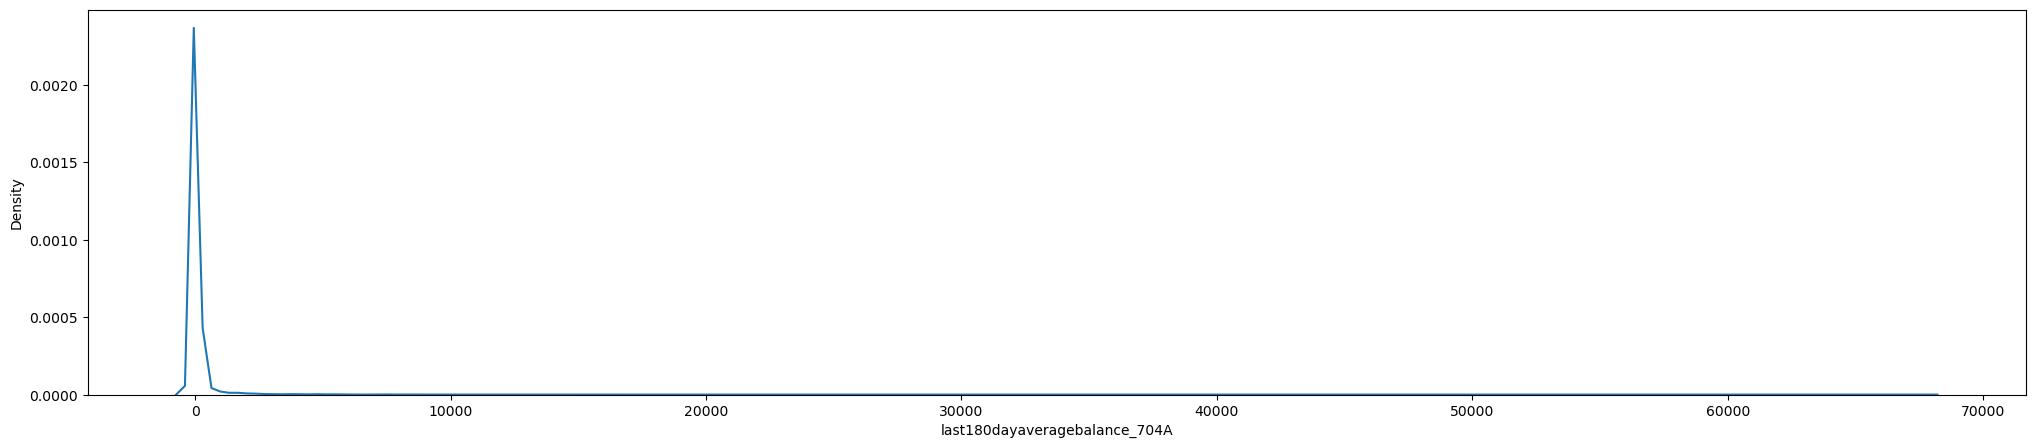

In [85]:
# 분포 확인 → 0이 압도적으로 많음
plt.figure(figsize=(25, 5))
sns.kdeplot(data=new_data, x=new_data["last180dayaveragebalance_704A"])

In [86]:
# 값 분포 수치로 확인
new_data["last180dayaveragebalance_704A"].value_counts(normalize=True)

0.0000       0.658972
6.0000       0.004257
0.0800       0.003847
0.1200       0.003766
0.1600       0.002947
               ...   
274.5640     0.000082
4770.3490    0.000082
2775.8760    0.000082
7336.2783    0.000082
1.8800       0.000082
Name: last180dayaveragebalance_704A, Length: 2495, dtype: float64

① 검증: 채무불이행자가 채무이행자보다 직불카드 평균 잔액이 더 적다

In [87]:
upsampled_new_data_1 = pd.DataFrame(resample(new_data_0, replace=True, n_samples=len(new_data_1), random_state=0xC0FFEE))  # 분포 비교를 위해 업샘플링

# 두 데이터셋의 분포 비교
ks_stat, p_val = ks_2samp(new_data_1["last180dayaveragebalance_704A"], upsampled_new_data_1["last180dayaveragebalance_704A"])

print("KS Statistic:", ks_stat)
print("P-value:", p_val)  # p-value가 0.05 이상이므로 H0 기각 → 두 데이터의 분포는 동일하지 않다

KS Statistic: 0.007352941176470588
P-value: 0.9999878607266903


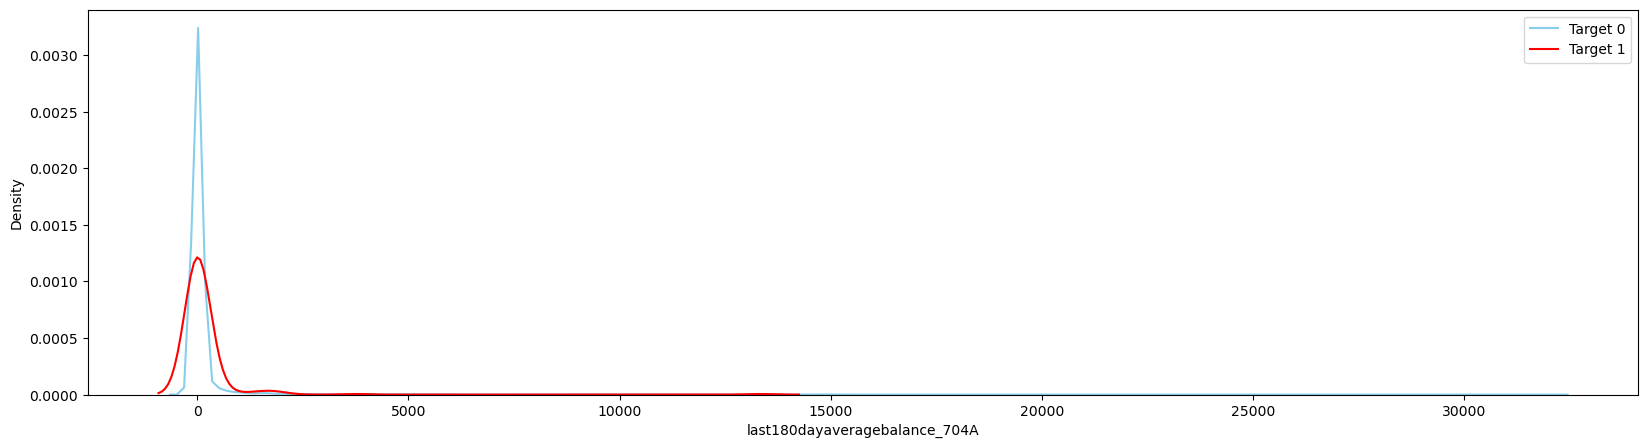

In [88]:
# 채무이행자, 채무불이행자 분포 확인
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

sns.kdeplot(data=new_data_0["last180dayaveragebalance_704A"], ax=ax, label="Target 0", color='skyblue')
sns.kdeplot(data=upsampled_new_data_1["last180dayaveragebalance_704A"], ax=ax, label="Target 1", color='red')

plt.legend()
plt.show()

Feature Extraction

In [89]:
new_data['iszero_704A'] = new_data['last180dayaveragebalance_704A'].apply(lambda x: 0 if x != 0 else 1)
new_data.drop(columns=["last180dayaveragebalance_704A"], inplace=True)
new_data

,case_id,last180dayturnover_1134A,last30dayturnover_651A,num_group1,openingdate_857D,target,iszero_704A
0,225,NaN,NaN,0,2016-08-16,0,0
1,331,NaN,NaN,0,2015-03-19,0,0
2,358,NaN,NaN,0,2014-09-02,0,0
3,390,NaN,NaN,0,2014-07-23,0,0
4,390,NaN,NaN,2,2016-06-08,0,0
...,...,...,...,...,...,...,...
157297,2703430,NaN,NaN,8,2016-11-26,0,0
157298,2703430,NaN,NaN,2,2014-02-14,0,0
157299,2703439,NaN,NaN,0,2016-11-25,0,0
157300,2703453,NaN,NaN,1,2015-05-29,0,0


&nbsp;(2) <b>last180dayturnover_1134A, last30dayturnover_651A</b><span style="color:orange; font-size:16px;">(※ 기간만 다른 동일 데이터여서 함께 비교)</span><br>
- 최근 180일/30일 동안 직불카드의 평균 출금액<span style="font-size:16px">(Debit card's turnover within the last 180/30 days)</span><br>
- 분포 확인 결과 흐름은 유사하나, 같진 않음</span><br>
- 다중공선성 낮음<span style="font-size:16px;">(VIF가 10 이하이므로)</span><br>
- 결측치 처리: last180dayturnover_1134A는 Drop, <b>last30dayturnover_651A</b>는 0인 값은 1로, 0이 아닌 값<span style="font-size:16px">(null 포함)</span>은 0으로 나누기<br><br>
<span style="color:orange">논거1: last180dayturnover_1134A는 target이 0일 때와 1일 때에 상관없이 분포가 유사하므로 Drop해도 된다고 생각함<br>
<span style="color:orange">논거2: target이 1인 모든 값이 0은 아니지만 상당수가 0에 몰려 있음<span style="font-size:16px;">(target data에 따른 분포 비교 참고)</span></span><br>
<span style="color:orange">논거3: 

In [90]:
# 데이터 크기 비교
target_0 = new_data["last180dayturnover_1134A"]
target_1 = new_data["last30dayturnover_651A"]

print(len(target_0), len(target_1))

157302 157302


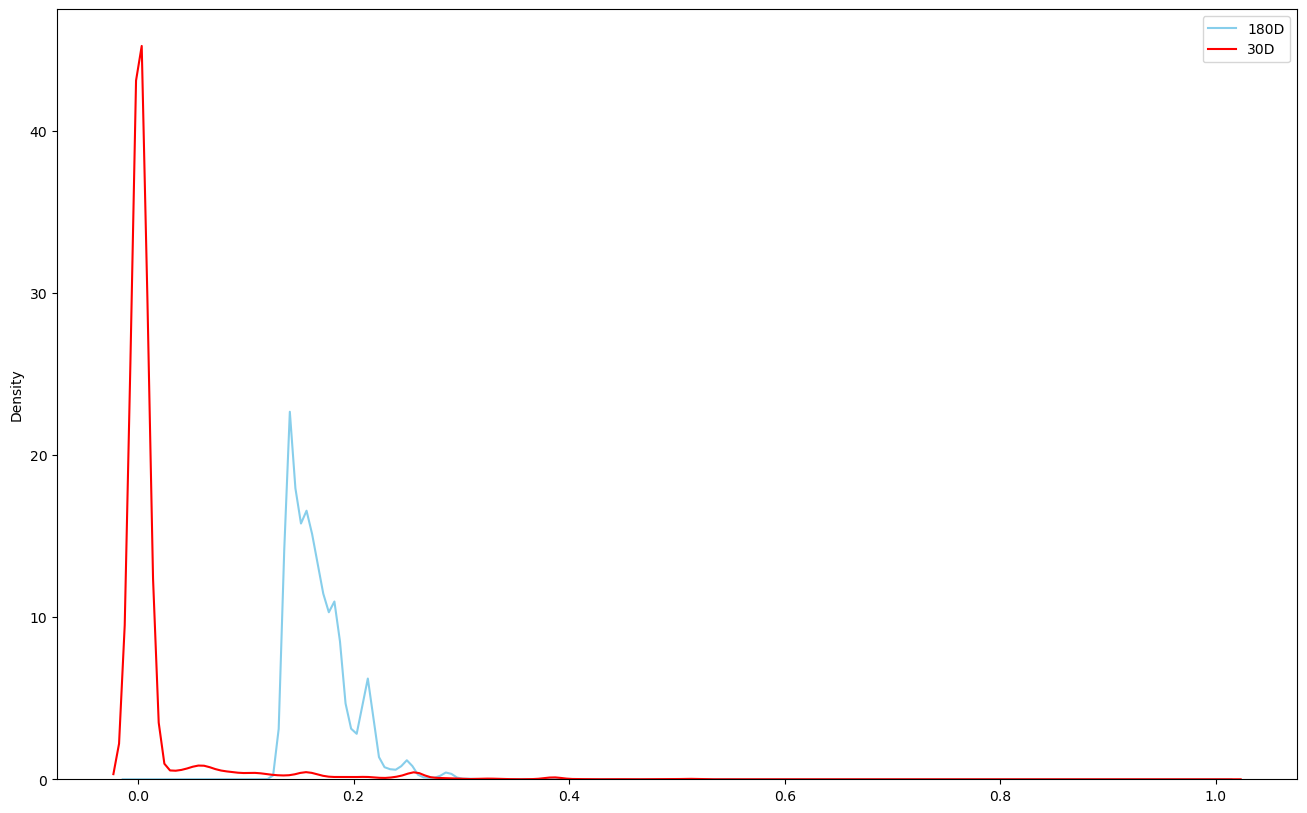

In [91]:
# 분포 확인
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df1 = scaler.fit_transform(target_0.values.reshape(-1, 1)).flatten()
scaled_df2 = scaler.fit_transform(target_1.values.reshape(-1, 1)).flatten()

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

sns.kdeplot(data=scaled_df1, ax=ax, label="180D", color='skyblue')
sns.kdeplot(data=scaled_df2, ax=ax, label="30D", color='red')

plt.legend()
plt.show()

다중공선성<span style="font-size:16px;">(Multicollinearity)</span> 확인

<Axes: >

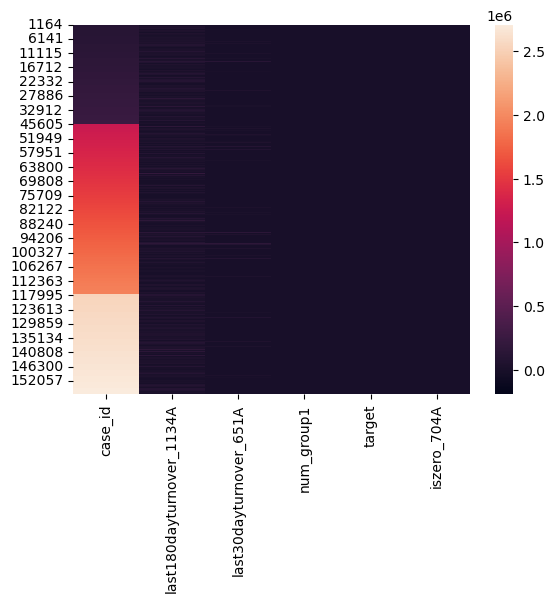

In [92]:
# 1. heatmap → 이게 뭐야
new_data_mc = new_data.drop(columns=["openingdate_857D"]).dropna()
sns.heatmap(new_data_mc)

In [93]:
# 2. VIF(Variance Inflation Factor): 각 독립 변수의 분산이 다른 독립 변수들에 의해 얼마나 증가하는지를 나타내는 지표
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# 필요한 컬럼 선택
columns_to_check = ['last180dayturnover_1134A', 'last30dayturnover_651A']
df_selected = new_data_mc[columns_to_check]

# VIF 계산 및 출력
vif_df = calculate_vif(df_selected)
print(vif_df)

                    Feature       VIF
0  last180dayturnover_1134A  1.199083
1    last30dayturnover_651A  1.199083


target data에 따른 분포 비교

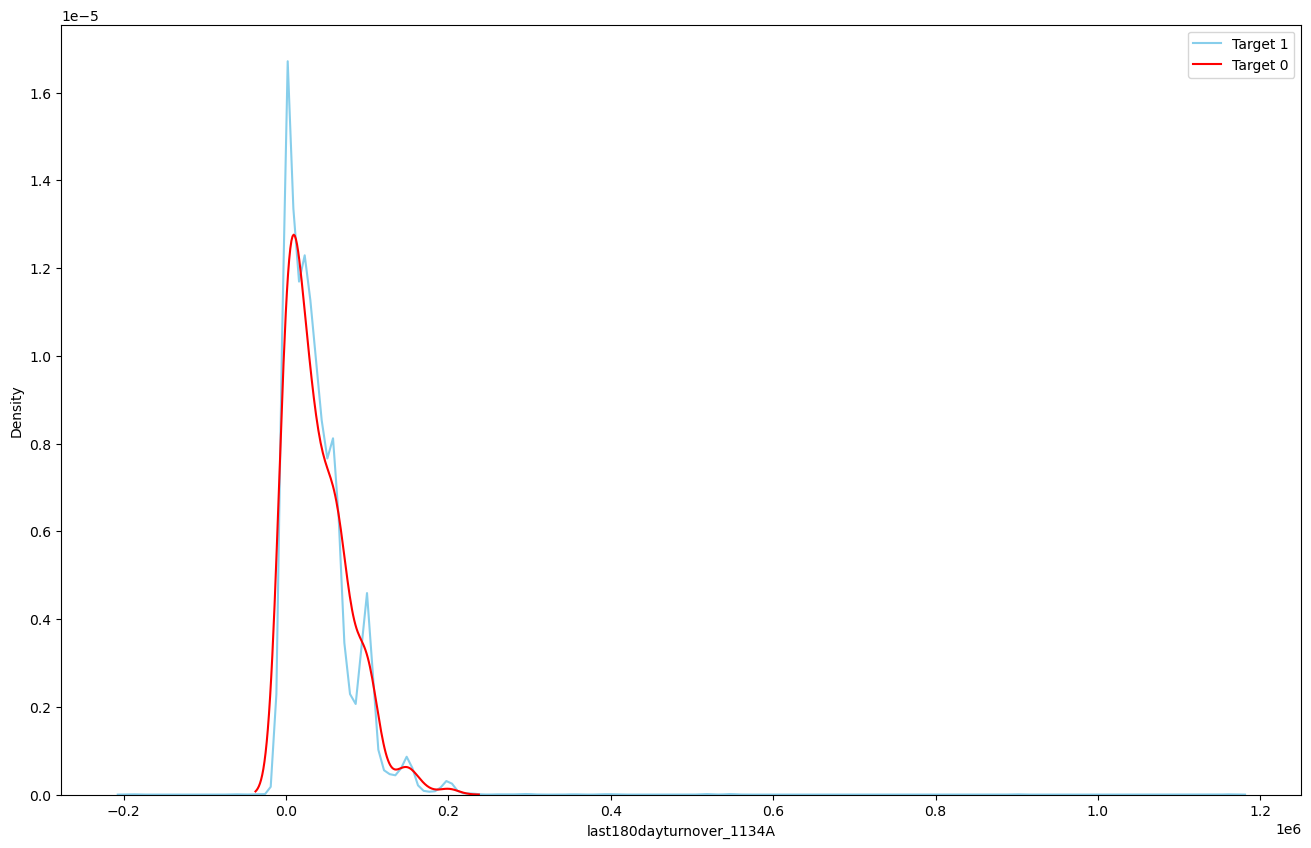

In [94]:
# last180dayturnover_1134A: 별 차이 없음
target_0 = new_data[new_data["target"] == 0]
target_1 = new_data[new_data["target"] == 1]

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

sns.kdeplot(data=target_0["last180dayturnover_1134A"], ax=ax, label="Target 1", color='skyblue')
sns.kdeplot(data=target_1["last180dayturnover_1134A"], ax=ax, label="Target 0", color='red')

plt.legend()
plt.show()

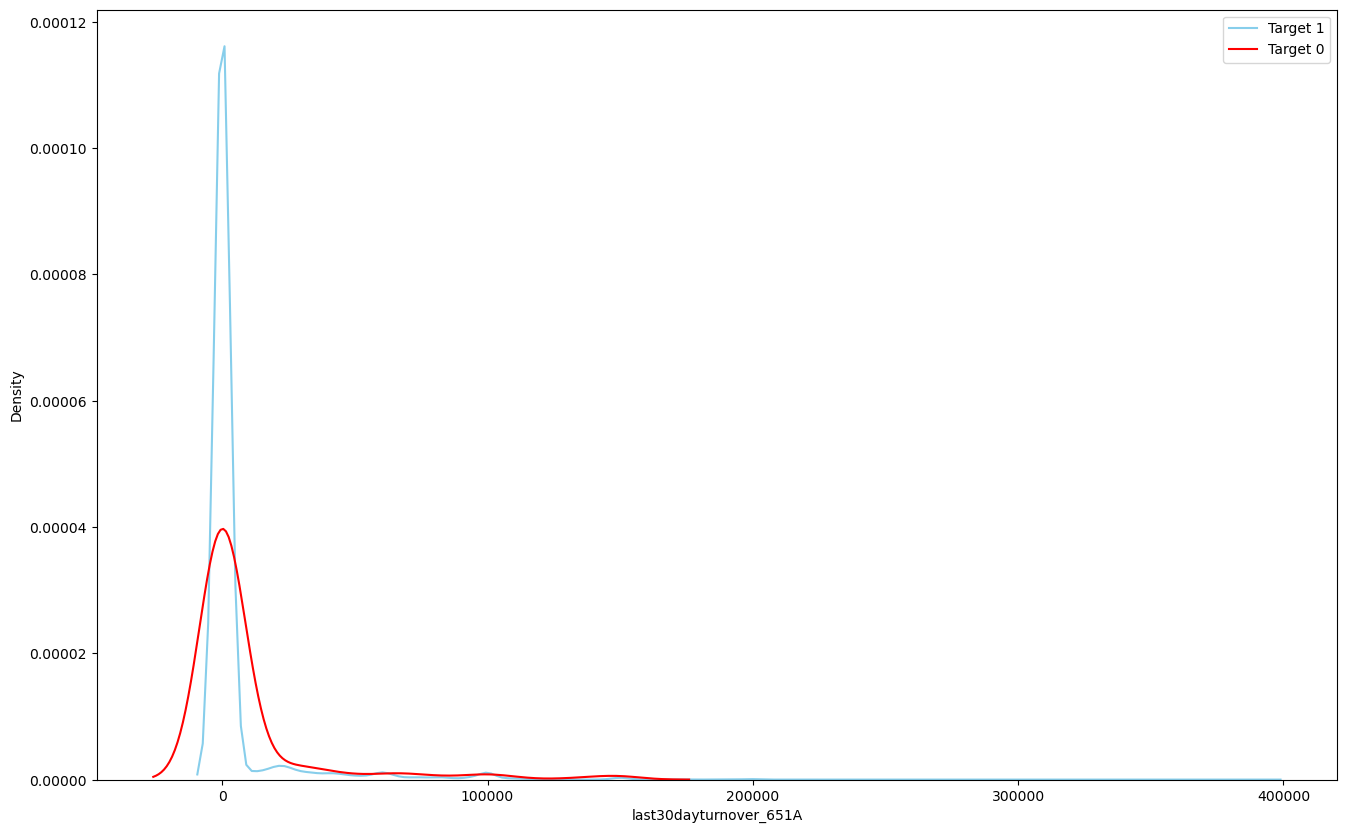

In [95]:
# last30dayturnover_651A: target data에 따라 차이가 있음
target_0 = new_data[new_data["target"] == 0]
target_1 = new_data[new_data["target"] == 1]

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

sns.kdeplot(data=target_0["last30dayturnover_651A"], ax=ax, label="Target 1", color='skyblue')
sns.kdeplot(data=target_1["last30dayturnover_651A"], ax=ax, label="Target 0", color='red')

plt.legend()
plt.show()

Feature Extraction

In [96]:
new_data['iszero_651A'] = new_data['last30dayturnover_651A'].apply(lambda x: 0 if x != 0 else 1)
new_data.drop(columns=["last180dayturnover_1134A", "last30dayturnover_651A"], inplace=True)
new_data

,case_id,num_group1,openingdate_857D,target,iszero_704A,iszero_651A
0,225,0,2016-08-16,0,0,0
1,331,0,2015-03-19,0,0,0
2,358,0,2014-09-02,0,0,0
3,390,0,2014-07-23,0,0,0
4,390,2,2016-06-08,0,0,0
...,...,...,...,...,...,...
157297,2703430,8,2016-11-26,0,0,0
157298,2703430,2,2014-02-14,0,0,0
157299,2703439,0,2016-11-25,0,0,0
157300,2703453,1,2015-05-29,0,0,0


&nbsp;(3) <b>openingdate_857D</b><br>
- 직불 카드 최초 발급일<span style="font-size:16px">(Debit card opening date)</span><br>
- target에 따른 분포 차이는 거의 없음<br>
- 결측치 처리 <span style="color:orange; font-size:16px;">(※ null 값들이 왜 null인지, 본 컬럼이 null 값일 때 DataFrame 전체에서 보이는 특징은 못 찾음)</span><br>
① Column Drop<br>
<span style="color:orange">논거: target이 1일 때와 0일 때 분포 차이가 없음</span><br>
<span style="color:orange">→ 이 컬럼이 target에 미치는 영향이 거의 없다고 판단함</span><br>

<Axes: xlabel='openingdate_857D', ylabel='Density'>

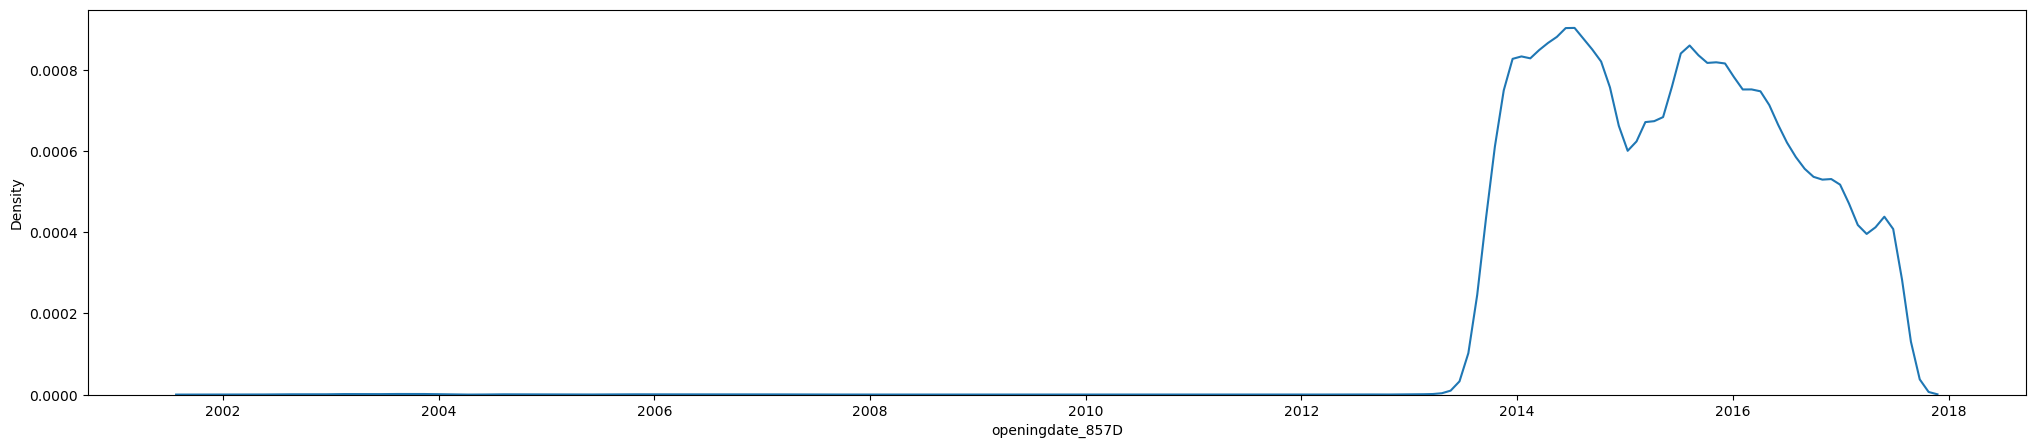

In [97]:
# 분포 확인
plt.figure(figsize=(25, 5))
sns.kdeplot(data=new_data, x=new_data["openingdate_857D"])

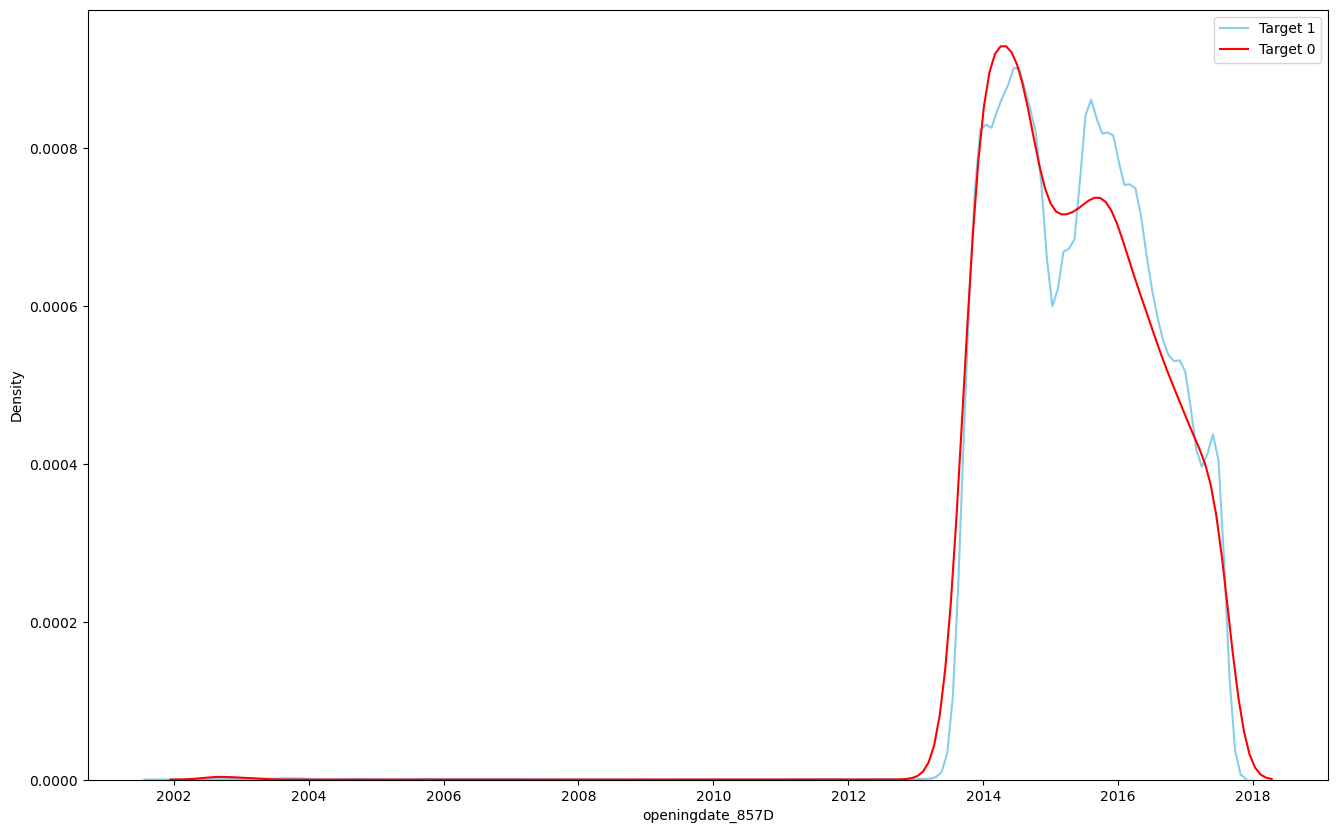

In [98]:
# target에 따른 분포 차이
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

sns.kdeplot(data=target_0["openingdate_857D"], ax=ax, label="Target 1", color='skyblue')
sns.kdeplot(data=target_1["openingdate_857D"], ax=ax, label="Target 0", color='red')

plt.legend()
plt.show()

In [99]:
# 값 분포 수치로 확인
new_data["openingdate_857D"].value_counts(normalize=True)

2014-07-11    0.002545
2014-04-11    0.002116
2014-03-28    0.002102
2014-04-09    0.002082
2013-12-26    0.002082
                ...   
2003-09-30    0.000007
2006-12-24    0.000007
2005-01-12    0.000007
2001-11-19    0.000007
2017-04-23    0.000007
Name: openingdate_857D, Length: 1578, dtype: float64

Feature Extraction

In [100]:
new_data.drop(columns=["openingdate_857D"], inplace=True)
new_data

,case_id,num_group1,target,iszero_704A,iszero_651A
0,225,0,0,0,0
1,331,0,0,0,0
2,358,0,0,0,0
3,390,0,0,0,0
4,390,2,0,0,0
...,...,...,...,...,...
157297,2703430,8,0,0,0
157298,2703430,2,0,0,0
157299,2703439,0,0,0,0
157300,2703453,1,0,0,0


##### &nbsp;&nbsp;6\) Aggregation

In [101]:
debitcard_1 = new_data.groupby(by='case_id').agg(lambda x: x.mode().iloc[0])
debitcard_1

,num_group1,target,iszero_704A,iszero_651A
case_id,,,,
225,0,0,0,0
331,0,0,0,0
358,0,0,0,0
390,0,0,0,0
445,0,0,0,0
...,...,...,...,...
2703426,0,0,0,0
2703427,0,0,0,0
2703430,0,0,0,0


In [102]:
# nunique 체크
debitcard_1.index.nunique()

111772

Downsampling